<a href="https://colab.research.google.com/github/abj12798/Udacity_data_Analyst/blob/master/Analyze_ab_test_results_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [48]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [49]:
#mounting the drive.
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [50]:

#setting path to read the data
path_ab_data="/content/gdrive/My Drive/Udacity project work/Project3/ab_data.csv" 
#Reading the ab_dataset and storing it in df.
df=pd.read_csv(path_ab_data)

# let's have a look on top of few rows.
df.head()


,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [51]:
#to find number of rows in the dataset lets find the shape of dataframe.
print('shape of the data frame:'+str(df.shape[0]))

shape of the data frame:294478


c. The number of unique users in the dataset.

In [52]:
#to findout the number of unique users in dataset focus on user_id  as it is unique.
print('Number of unique users in the dataset are:'+str(df['user_id'].nunique()) )

Number of unique users in the dataset are:290584


d. The proportion of users converted.

In [53]:
# Here converted are represented by 1. so we have to get the proportion of 1 in converted column.
df['converted'].value_counts(normalize=True)

0    0.880341
1    0.119659
Name: converted, dtype: float64

e. The number of times the `new_page` and `treatment` don't line up.

In [54]:
#checking number of times the new_page and treatment don't line up.
print('Number of times the new page and terastment don\'t line up  '+ str(df[(df.landing_page == 'new_page') ^ (df.group == 'treatment')].shape[0]))

Number of times the new page and terastment don't line up  3893


f. Do any of the rows have missing values?

In [55]:
#finding the rows with missing values.
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
print('Number of rows with missing values in dataset are:'+ str(rows_with_NaN.shape[0]))

Number of rows with missing values in dataset are:0


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [56]:
#As form here it is visible that the  we are only sure about the data if alingned as per the above given condition.

#for Newpage
data_NewPage = df[ (df.landing_page == 'new_page') & (df.group == 'treatment')]

#for Oldpage
data_OldPage = df[ (df.landing_page == 'old_page') & (df.group == 'control')]

#merging data 
df2 = data_NewPage.append(data_OldPage, ignore_index = True)

In [57]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [58]:
print('Number of unique users in df2 dataset are:'+ str(df2['user_id'].nunique()))

Number of unique users in df2 dataset are:290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [59]:
#creating the object of dataframe object.
df2Obj = pd.DataFrame(df2, columns= df2.columns)

#finding duplicate row
duplicateRowsDF2 = df2Obj[df2Obj.duplicated(['user_id'])]

# showing the duplicate row
duplicateRowsDF2

,user_id,timestamp,group,landing_page,converted
1404,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [60]:
df2[df2.user_id == 773192]

,user_id,timestamp,group,landing_page,converted
938,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
1404,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [61]:
#removing duplicate rows from dataframe df2.
df2 = df2.drop_duplicates(subset='user_id', keep="first")

#confirming that now there is no duplicate row in 

print('is there any duplicate row in df2 dataframe '+ str(df2.duplicated().any()))


is there any duplicate row in df2 dataframe False


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [62]:
#converted is shown by 1 so we have to findout the propor tion of 1 in the df2 data frame.
df2['converted'].value_counts(normalize=True)

0    0.880403
1    0.119597
Name: converted, dtype: float64

b. Given that an individual was in the `control` group, what is the probability they converted?

In [63]:
# probability that indiviual in control group is converted is shown by 1. 
df2[df2.group == 'control']['converted'].value_counts(normalize=True)

0    0.879614
1    0.120386
Name: converted, dtype: float64

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [64]:
# probability that indiviual in treatment group is converted is shown by 1.
df2[df2.group == 'treatment']['converted'].value_counts(normalize=True)

0    0.881192
1    0.118808
Name: converted, dtype: float64

d. What is the probability that an individual received the new page?

In [65]:
#probability that indiviual recieved a new_page is shown by new_page.
df2['landing_page'].value_counts(normalize=True)

new_page    0.500062
old_page    0.499938
Name: landing_page, dtype: float64

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

We can say by above analysis of data that:

1.    The probability of users will be converted regardless of the page they have recieved is 11.96% 
2.   The probability of users in control group are converted is 12.04%
3. The Probability that user was in the treatment group are  converted is 11.88%.
4. The probablity users converted in both control and treatment group are almost close or similar to each other and probability of an individual converting regardless of the page they receive. therefore, there is no evidence that ne page leads to more conversions.







<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Hypothesis:**


1.   p_Old - p_New >= 0
2.   p_Old - p_New < 0



`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [66]:
p_New = df2[df2['converted'] == 1].user_id.nunique()/df2.user_id.nunique()
p_New

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [67]:
p_Old = df2[df2['converted'] == 1].user_id.nunique()/df2.user_id.nunique()
p_Old

0.11959708724499628

c. What is $n_{new}$?

In [68]:
n_New = df2[df2['landing_page'] == 'new_page'].user_id.nunique()
n_New

145310

d. What is $n_{old}$?

In [69]:
n_Old = df2[df2['landing_page'] == 'old_page'].user_id.nunique()
n_Old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [70]:
new_page_converted = np.random.choice(2, size=n_New, p=[1-p_New,p_New])
new_page_converted.view()

array([0, 0, 0, ..., 1, 0, 0])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [71]:
old_page_converted = np.random.choice(2, size= n_Old, p = [1- p_Old,p_Old])
old_page_converted.view()

array([0, 0, 0, ..., 0, 0, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [72]:
val = new_page_converted.mean() - old_page_converted.mean()
val

0.0017325206653864417

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [73]:
p_diffs = []
size = df.shape[0] 
for _ in range(10000):
    samp = df2.sample(size, replace = True)

    new_page_converted = np.random.choice([0,1],n_New, p=(p_New,1-p_New))

    old_page_converted = np.random.choice([0,1],n_Old, p=(p_Old,1-p_Old))

    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

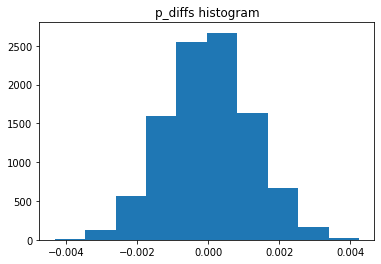

In [89]:
plt.title('p_diffs histogram')
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [90]:
# find the  number of users  converted = 1 and  landing_page = new_page 
convert_new = df2[(df2.converted == 1) & (df2.landing_page == 'new_page')]['user_id'].nunique()

#find the number of users converted = 1 and  landing_page = old_page

convert_old = df2[(df2.converted == 1) & (df2.landing_page == 'old_page')]['user_id'].nunique()


In [91]:
# Computing actual converted rate new_page

act_converted_rate_new = convert_new/n_New

# Computing actual converted rate old_page

act_converted_rate_old = convert_old/n_Old

In [77]:
proportion_greater_act_diff =  act_converted_rate_new - act_converted_rate_old
print('prportion greater than actual diffrence'+ str(proportion_greater_act_diff))

prportion greater than actual diffrence-0.0015782389853555567


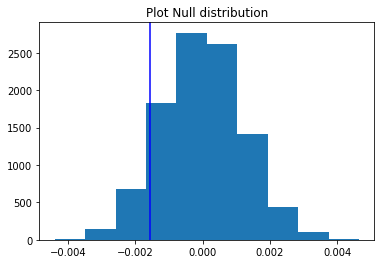

In [78]:
# create distribution under the null hypothesis
null_vals = np.random.normal(0, np.std(p_diffs), np.array(p_diffs).size)
#Plot Null distribution
plt.title('Plot Null distribution')
plt.hist(null_vals)
#Plot vertical line for observed statistic
plt.axvline(x=proportion_greater_act_diff,color ='blue');

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Put your answer here.**

In the problem, we are given with Type I error rate of 5%, and the obtained p-value > Alpha, we fail to reject the null.
Hence the data shows, with a type I error rate of 0.05, that the old page has higher probablity of convert rate than new page.
P-Value: The probability of observing our statistic or a more extreme statistic from the null hypothesis.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [79]:
import statsmodels.api as sm

convert_old = df2[(df2.converted == 1) & (df2.landing_page == 'old_page')]['user_id'].nunique()
convert_new = df2[(df2.converted == 1) & (df2.landing_page == 'new_page')]['user_id'].nunique()
n_old = df2[df2.group == 'control']['user_id'].nunique()
n_new = df2[df2.group == 'treatment']['user_id'].nunique()

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [80]:
z_score, p_value = sm.stats.proportions_ztest(np.array([convert_new,convert_old]),np.array([n_new,n_old]), alternative = 'larger')

In [81]:
print('z_ score ='+ str(z_score))
print('p_value =' + str(p_value))

z_ score =-1.3109241984234394
p_value =0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Put your answer here.**

Since, The z-score of 1.3109241984234394 does not exceed the critical value of 1.959963984540054.We fail to reject the null hypothesis that old page users has a better or equal converted rate than old page users.Therefore, the converted rate for new page and old page have no difference.This result is the same as parts J. and K. result.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Put your answer here.**

Logistic Regression.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [82]:
#creating column name intercept having value 1

df2['intercept'] = 1;

#creating dummy variable 

df2= df2.join(pd.get_dummies(df2['landing_page']))


#creating column name ab_page where if treatment 1 and control 0

df2['ab_page'] = np.where(df2['group'] =='treatment', 1, 0)


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [83]:
#Create Logit regression model for conveted variable and  ab_page, and us control as baseline
log = sm.Logit(df2['converted'], df2[['intercept','ab_page']])

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [84]:
#fitting the model
result = log.fit()

#summary of the model
result.summary()




Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Mon, 29 Jun 2020   Pseudo R-squ.:               8.077e-06
Time:                        13:17:49   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**Put your answer here.**

1. The p-value associated with ab_page is 0.19.

2. The null hypothesis associated here - is that there is no difference between the treatment and control group.

3. Alternative hypotheses is that there is difference between the treatment and control group

4. Part II assumes that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, so when compared from both the above sceanrios,they have different explainory varibale or factor for the result.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Put your answer here.**
Other factors which might influence is time(timestamp variable). We can observe if there is any difference in browsing time of each user, so that the conversion rate will vary as per the time.
For this timestamp variable, we can further convert time as categorical variable which includes "Morning, afternoon, and evening", or "weekday and weekend".
The main disadavantage for adding additional terms into regression model is that it will make our model more comlplex which can complicate in interpreting the model output. There is a chance of having multicollinearity and overfitting if these new variables are not taken care off.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [85]:
country_data = "/content/gdrive/My Drive/Udacity project work/Project3/countries.csv"
countries_df = pd.read_csv(country_data)
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [86]:
### Create the necessary dummy variables
countries = pd.get_dummies(df_new['country'])
df_new['country_CA'] = countries['CA']
df_new['country_UK'] = countries['UK']
df_new['country_US'] = countries['US']

df_new


,country,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page,country_CA,country_UK,country_US
user_id,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
653118,US,2017-01-09 03:12:31.034796,control,old_page,0,1,0,1,0,0,0,1
878226,UK,2017-01-05 15:02:50.334962,control,old_page,0,1,0,1,0,0,1,0
799368,UK,2017-01-09 18:07:34.253935,control,old_page,0,1,0,1,0,0,1,0


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [87]:
#Create Logit regression model for converted and country, and us CA and old page as baseline
logit_model = sm.Logit(df_new['converted'], df_new[['intercept','new_page','country_UK','country_US']])

### Fit Your Linear Model And Obtain the Results
result = logit_model.fit()

result.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Mon, 29 Jun 2020   Pseudo R-squ.:               2.323e-05
Time:                        13:17:52   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
new_page      -0.0149      0.011     -1.307      0.191      -0.037       0.007
country_UK     0.0506      0.028      1.784      0.074      -0.005       0.106
country_US     0.0408      0.027      1.516      0.130      -0.012       0.093
==============================================================================
"""

In [88]:
#exponentiated the CV to inteprete the result

np.exp(result.params)

intercept     0.131332
new_page      0.985168
country_UK    1.051944
country_US    1.041599
dtype: float64

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 


1. From the above Logit Regression Results, we can see that the only intercept's p-value is less than 0.05, which is statistically significant enough for converted rate but other variables are not statistically significant.
2. The country a user lives is not statistically significant on the converted rate considering the page the user land in.
3. For every unit for new_page decreases, the user getting converted will be 7.0% more likely to happen while holding all other varibles constant.
4. The user getting Converted is 1.08 times more likely to happen for UK and new page users than CA and new page users while holding all other varible constant.
5. The user getting Converted is 1.04 times more likely to happen for US and new page users than CA and new page users while holding all other varible constant.

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).


You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.